In [1]:
import pandas as pd
import cv2
import os
from PIL import Image
from matplotlib import pyplot as plt
from utils import *

plt.style.use('ggplot')

## Computing feature value of non-compressed image
1338 non-compressed images from the UCID image dataset are used

In [2]:
original_features_file = './Data/original_feature.csv'
d = 7; tau = 100

if not os.path.exists(original_features_file):
    feature_data = {'original': []}
    for img in os.listdir(dataset_path):
        # Reading the image
        I = cv2.imread(os.path.join(dataset_path, img), 0)

        # Extracting feature
        feature_data['original'].append(caoICME10(I, d, tau))

    original_feature_data_frame = pd.DataFrame(feature_data)
    original_feature_data_frame.to_csv(original_features_file, index=False)

## Computing feature values of median filtered images
Median filter with kernal size 3, 5, 7 and 9 is applied to uncompressed images

In [17]:
median_features_file = './Data/median_feature.csv'
d = 7; tau = 100

if not os.path.exists(median_features_file):
    filter_sizes = [3, 5, 7, 9]
    feature_data = {'median-3': [],
                    'median-5': [],
                    'median-7': [],
                    'median-9': []}

    for filter_size in filter_sizes:
        for img in os.listdir(dataset_path):
            # Reading the image
            I = cv2.imread(os.path.join(dataset_path, img), 0)

            # Applying median filter on the image
            filtered_I = cv2.medianBlur(I, filter_size)

            # Extracting feature from the median filtered image
            feature_data[f'median-{filter_size}'].append(caoICME10(filtered_I, d, tau))

    median_feature_data_frame = pd.DataFrame(feature_data)
    median_feature_data_frame.to_csv(median_features_file, index=False)

## Computing feature values of JPEG images
Quality factor of 55, 75, 95 sizes used for jpeg compression

In [24]:
jpeg_features_file = './Data/jpeg_feature.csv'
d = 7; tau = 100

if not os.path.exists(jpeg_features_file):
    quality_factors = [55, 75, 95]
    feature_data = {'jpeg-55': [],
                    'jpeg-75': [],
                    'jpeg-95': []}

    for quality_factor in quality_factors:
        for img in os.listdir(dataset_path):
            # Reading the image
            I = Image.open(os.path.join(dataset_path, img))
            
            # Saving the image as temporary file
            I.save('./Data/temp.jpeg', "JPEG", quality=quality_factor)

            # Extracting feature
            jpeg_image = cv2.imread('./Data/temp.jpeg', 0)
            feature_data[f'jpeg-{quality_factor}'].append(caoICME10(jpeg_image, d, tau))

            # Deleting the temporary image
            os.remove('./Data/temp.jpeg')

    jpeg_feature_data_frame = pd.DataFrame(feature_data)
    jpeg_feature_data_frame.to_csv(jpeg_features_file, index=False)

## Computing features of various filtered images
Average, Gaussian filter with filter size 3 and 5 applied

In [2]:
filter_features_file = './Data/filter_feature.csv'
d = 7; tau = 100

if not os.path.exists(filter_features_file):
    filter_sizes = [3, 5]
    feature_data = {'average-3': [],
                    'average-5': [],
                    'gaussian-3': [],
                    'gaussian-5': []}

    for filter_n in ['average', 'gaussian']:
        for filter_size in filter_sizes:
            for img in os.listdir(dataset_path):
                # Reading the image
                I = cv2.imread(os.path.join(dataset_path, img), 0)

                # Applying the filter
                if filter_n == 'average':
                    I = cv2.blur(I, (filter_size, filter_size))
                elif filter_n == 'gaussian':
                    I = cv2.GaussianBlur(I, (filter_size, filter_size), 0)
                
                # Extracting feature from the filtered image
                feature_data[f'{filter_n}-{filter_size}'].append(caoICME10(I, d, tau))

    filter_feature_data_frame = pd.DataFrame(feature_data)
    filter_feature_data_frame.to_csv(filter_features_file, indx=False)

## Computing features of bilinear scaled images
Bilinear scaled of sizes 0.6 and 2.0 are applied

In [9]:
scaled_features_file = './Data/scaled_feature.csv'
d = 7; tau = 100

if not os.path.exists(scaled_features_file):
    feature_data = {'bilinear-0.6': [],
                    'bilinear-2.0': []}

    for scaled_n in ['bilinear-scaled']:
        for scaled_size in [0.6, 2.0]:
            for img in os.listdir(dataset_path):
                # Reading the image
                I = cv2.imread(os.path.join(dataset_path, img), 0)

                # Resizing the image
                I = cv2.resize(I, (int(I.shape[0]*scaled_size), int(I.shape[1]*scaled_size)), interpolation = cv2.INTER_LINEAR)

                # Extracting feature from the resized image
                feature_data[f'{scaled_n}-{scaled_size}'].append(caoICME10(I, d, tau))

    scaled_feature_data_frame = pd.DataFrame(feature_data)
    scaled_feature_data_frame.to_csv(scaled_features_file, index=False)

In [53]:
# Load the features
original_feature_data_frame = pd.read_csv('./Data/original_feature.csv')
median_feature_data_frame = pd.read_csv('./Data/median_feature.csv')
filter_feature_data_frame = pd.read_csv('./Data/filter_feature.csv')
scaled_feature_data_frame = pd.read_csv('./Data/scaled_feature.csv')
jpeg_feature_data_frame = pd.read_csv('./Data/jpeg_feature.csv')

data = pd.concat([original_feature_data_frame,
                  median_feature_data_frame,
                  filter_feature_data_frame,
                  scaled_feature_data_frame,
                  jpeg_feature_data_frame], axis=1)

In [54]:
data.head()

,original,median-3,median-5,median-7,median-9,average-3,average-5,gaussian-3,gaussian-5,bilinear-0.6,bilinear-2.0,jpeg-55,jpeg-75,jpeg-95
0,0.055376,0.307052,0.288448,0.273895,0.251888,0.091859,0.108970,0.087583,0.097648,0.065588,0.081895,0.061125,0.053829,0.049855
1,0.071897,0.338539,0.324721,0.311597,0.302741,0.125639,0.144068,0.121438,0.132531,0.088339,0.122446,0.081551,0.068895,0.060563
2,0.062964,0.271375,0.275407,0.262895,0.250269,0.092775,0.097666,0.089242,0.092903,0.064187,0.091571,0.063774,0.058479,0.057244
3,0.079806,0.323818,0.306543,0.281896,0.251254,0.116261,0.108153,0.114667,0.107678,0.101673,0.106746,0.069315,0.056396,0.058456
4,0.060508,0.302268,0.293226,0.275041,0.254244,0.097824,0.106820,0.093405,0.099974,0.068456,0.091069,0.060495,0.051087,0.049815


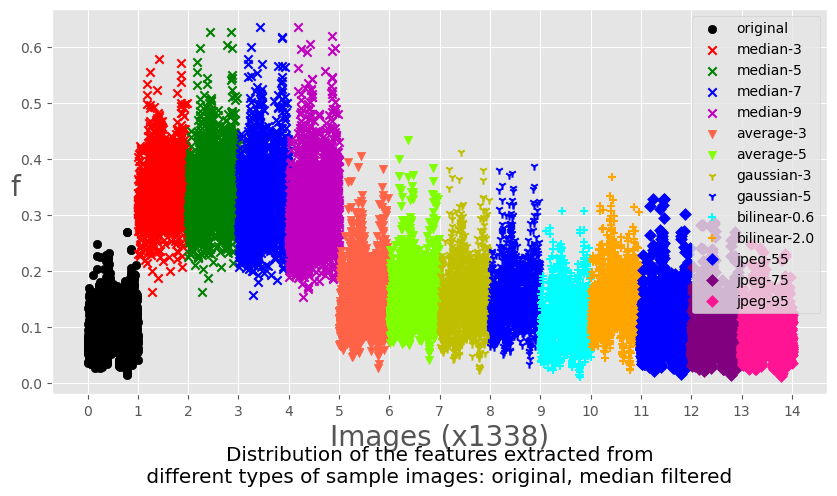

In [56]:
# Ploting the features
columns = data.columns
colors = ['k', 'r', 'g', 'b', 'm', 'tomato', 'chartreuse', 'y', 'b', 'aqua', 'orange', 'b', 'purple', 'deeppink']
markers = ['o', 'x', 'x', 'x', 'x', 'v', 'v', '1', '1', '+', '+', 'D', 'D', 'D']
for i in range(len(columns)):
    plt.scatter(np.arange(i, i+1, 1/data.shape[0]), data[columns[i]], label=columns[i], color=colors[i], marker=markers[i])

plt.xticks(np.arange(0, 15, 1.0))
plt.yticks(np.arange(0, 0.7, 0.1))
plt.xlabel("Images (x1338)", fontsize=20)
plt.ylabel("f", fontsize=20).set_rotation(0)
plt.title('Distribution of the features extracted from\n different types of sample images: original, median filtered ', y=-0.25)
plt.legend()
# plt.savefig('FIG-1')
plt.rcParams['figure.figsize'] = [10, 5]  # this changes default fig size
plt.show()

# ROC curve for the classification between original images and their median-filtered versions

In [3]:
# We will try different thresholds to differenciate median filtered and original images
thresholds = np.arange(0, 1, 1/25)

In [ ]:
# Load the features
original_feature = pd.read_csv('./Data/original_feature.csv')['original']
median_feature_data_frame = pd.read_csv('./Data/median_feature.csv')

In [23]:
# Computing true positive and false positive values
median_rates = dict()
for filter_name in median_feature_data_frame.columns:
    median_rates[filter_name] = {'TP-rates': [],
                                 'FP-rates': []}
    for threshold in thresholds:
        rates = TPFP_calculator(median_feature_data_frame[filter_name], original_feature, threshold)
        median_rates[filter_name]['TP-rates'].append(rates[0]) 
        median_rates[filter_name]['FP-rates'].append(rates[1])

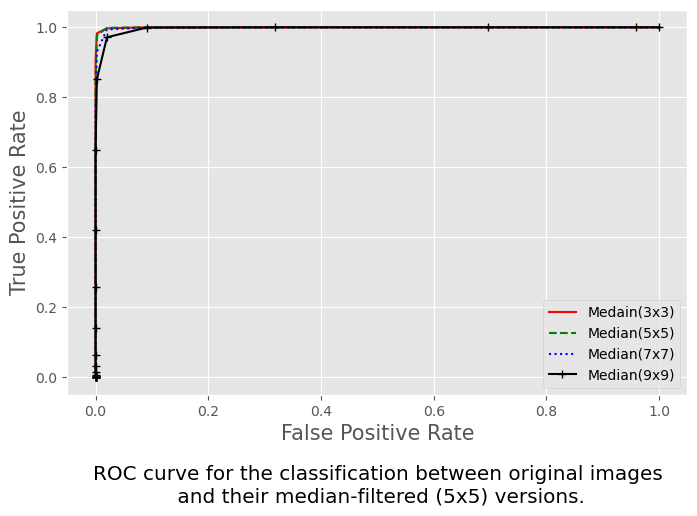

In [25]:
# Ploting the features
plt.rcParams['figure.figsize'] = [8, 5]

plt.plot(median_rates['median-3']['FP-rates'], median_rates['median-3']['TP-rates'], 'r', label='Medain(3x3)')
plt.plot(median_rates['median-5']['FP-rates'], median_rates['median-5']['TP-rates'], 'g--', label='Median(5x5)')
plt.plot(median_rates['median-7']['FP-rates'], median_rates['median-7']['TP-rates'], 'b:', label='Median(7x7)')
plt.plot(median_rates['median-9']['FP-rates'], median_rates['median-9']['TP-rates'], 'k-+', label='Median(9x9)')

plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.title('ROC curve for the classification between original images\n and their median-filtered (5x5) versions.', y=-0.30)
plt.legend()

plt.show()

# ROC curve for the classification between the manipulated images and their median-filtered versions.

In [ ]:
# Data generation and feature computation
filter_features_file = './Data/filter_median5x5_feature.csv'
d = 7; tau = 100

if not os.path.exists(filter_features_file):
    feature_data = {'bilinear-0.6': [], 
                    'bilinear-2.0': [],
                    'average-3': [],
                    'average-5': [],
                    'gaussian-3': [],
                    'gaussian-5': [],
                    'jpeg-55': [],
                    'jpeg-75': [],
                    'jpeg-95': []}

    for img in os.listdir(dataset_path):
        # Reading the image
        I = cv2.imread(os.path.join(dataset_path, img), 0)
        
        # For bilinear filtered images
        for filter_size in [0.6, 2.0]:
            # Applying the filters
            dim = (int(I.shape[0]*filter_size), int(I.shape[1]*filter_size))
            I_blurred = cv2.medianBlur(cv2.resize(I, dim, interpolation = cv2.INTER_LINEAR), 5)

            # Extracting feature from the filtered image
            feature_data[f'bilinear-{filter_size}'].append(caoICME10(I_blurred, d, tau))
    
        # For average and gaussian images
        for filter_n in ['average', 'gaussian']:
            for filter_size in [3, 5]:
                if filter_n == 'average':
                    I_blurred = cv2.blur(I, (filter_size, filter_size))
                elif filter_n == 'gaussian':
                    I_blurred = cv2.GaussianBlur(I, (filter_size, filter_size), 0)
                
                # Applying median filter and extracting feature
                feature_data[f'{filter_n}-{filter_size}'].append(caoICME10(cv2.medianBlur(I_blurred, 5), d, tau))
    
    # For jpeg images
    quality_factors = [55, 75, 95]
    for quality_factor in quality_factors:
        for img in os.listdir(dataset_path):
            # Reading the image
            I = Image.open(os.path.join(dataset_path, img))

            # Saving the jpeg image as temporary file
            I.save('./Data/temp.jpeg', "JPEG", quality=quality_factor)

            # Reading the jpeg image
            jpeg_image = cv2.imread('./Data/temp.jpeg', 0)

            # Applying median filter and extracting features
            feature_data[f'jpeg-{quality_factor}'].append(caoICME10(cv2.medianBlur(jpeg_image, 5), d, tau))
            
            # Deleting the temporary image
            os.remove('./Data/temp.jpeg')


    filter_feature_data_frame = pd.DataFrame(feature_data)
    filter_feature_data_frame.to_csv(filter_features_file, index=False)

In [ ]:
# Load the features
filter_median5x5_feature_data_frame = pd.read_csv('./Data/filter_median5x5_feature.csv')
filter_feature_data_frame = pd.concat([pd.read_csv('./Data/filter_feature.csv'),
                                       pd.read_csv('./Data/jpeg_feature.csv'),
                                       pd.read_csv('./Data/scaled_feature.csv')], axis=1)

In [63]:
# Computing true positive and false positive values
thresholds = np.arange(0, 1, 1/25)

filter_median5x5_rates = dict()
for filter_name in filter_median5x5_feature_data_frame.columns:
    filter_median5x5_rates[filter_name] = {'TP-rates': [],
                                           'FP-rates': []}
    for threshold in thresholds:
        rates = TPFP_calculator(filter_median5x5_feature_data_frame[filter_name], filter_feature_data_frame[filter_name], threshold)
        filter_median5x5_rates[filter_name]['TP-rates'].append(rates[0]) 
        filter_median5x5_rates[filter_name]['FP-rates'].append(rates[1])

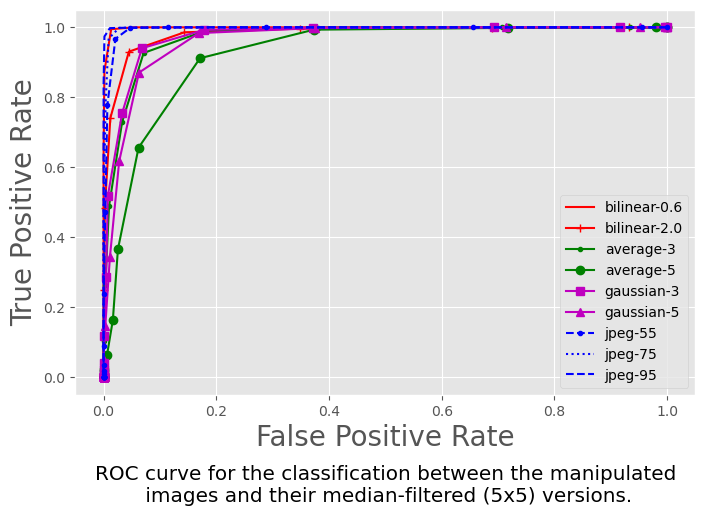

In [64]:
# Ploting the features
markers = ['r', 'r+-', 'g.-', 'go-', 'ms-', 'm^-', 'b.--', 'b:', 'b--']
for i, (filter_n, rates) in enumerate(filter_median5x5_rates.items()):
    plt.plot(rates['FP-rates'], rates['TP-rates'], markers[i], label=filter_n)

plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
plt.title('ROC curve for the classification between the manipulated\n images and their median-filtered (5x5) versions.', y=-0.3)
plt.legend()
plt.rcParams['figure.figsize'] = [8, 5]
plt.show()

# ROC curve for the classification between median-filtered (5x5) images and the images processed by other manipulations.

In [ ]:
# Load the features
median5x5_feature_data_frame = pd.read_csv('./Data/median_feature.csv')['median-5']
filter_feature_data_frame = pd.concat([pd.read_csv('./Data/filter_feature.csv'),
                                       pd.read_csv('./Data/jpeg_feature.csv'),
                                       pd.read_csv('./Data/scaled_feature.csv')], axis=1)

In [65]:
# Computing true positive and false positive values
thresholds = np.arange(0, 1, 1/25)

filter_rates = dict()
for filter_name in filter_feature_data_frame.columns:
    filter_rates[filter_name] = {'TP-rates': [],
                                 'FP-rates': []}
    for threshold in thresholds:
        rates = TPFP_calculator(median5x5_feature_data_frame, filter_feature_data_frame[filter_name], threshold)
        filter_rates[filter_name]['TP-rates'].append(rates[0])
        filter_rates[filter_name]['FP-rates'].append(rates[1])

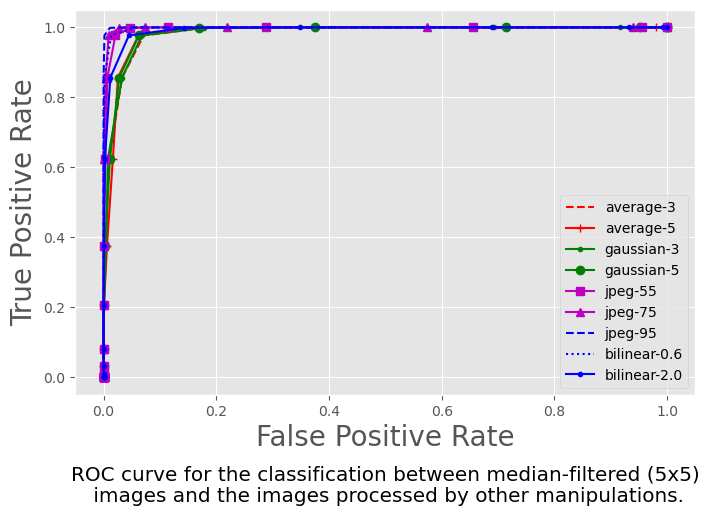

In [66]:
# Ploting features
markers = ['r--', 'r+-', 'g.-', 'go-', 'ms-', 'm^-', 'b--', 'b:', 'b.-']
for i, (filter_n, rates) in enumerate(filter_rates.items()):
    plt.plot(rates['FP-rates'], rates['TP-rates'], markers[i], label=filter_n)

plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
plt.title('ROC curve for the classification between median-filtered (5x5)\n images and the images processed by other manipulations.',
           y=-0.30)
plt.legend()
plt.rcParams['figure.figsize'] = [8, 5]
plt.show()

# ROC curve for the classification between the manipulated images and the post-manipulated median-filtered (5x5) images.

In [ ]:
# Data generation and feature computation
median5x5_filter_features_file = './Data/median5x5_filter_feature.csv'
d = 7; tau = 100

if not os.path.exists(median5x5_filter_features_file):
    feature_data = {'bilinear-0.6': [], 
                    'bilinear-2.0': [],
                    'average-3': [],
                    'average-5': [],
                    'gaussian-3': [],
                    'gaussian-5': [],
                    'jpeg-55': [],
                    'jpeg-75': [],
                    'jpeg-95': []}

    for img in os.listdir(dataset_path):
        # Reading the image
        I = cv2.imread(os.path.join(dataset_path, img), 0)
        
        # For bilinear filtered images
        for filter_size in [0.6, 2.0]:
            dim = (int(I.shape[0]*filter_size), int(I.shape[1]*filter_size))
            I_blurred = cv2.resize(cv2.medianBlur(I, 5), dim, interpolation = cv2.INTER_LINEAR)

            # Extracting feature from the resized image
            feature_data[f'bilinear-{filter_size}'].append(caoICME10(I_blurred, d, tau))
    
        # For average and gaussian images
        for filter_n in ['average', 'gaussian']:
            for filter_size in [3, 5]:
                I = cv2.medianBlur(I, 5)
                if filter_n == 'average':
                    I_blurred = cv2.blur(I, (filter_size, filter_size))
                elif filter_n == 'gaussian':
                    I_blurred = cv2.GaussianBlur(I, (filter_size, filter_size), 0)
                
                # Applying median filter and extracting feature
                feature_data[f'{filter_n}-{filter_size}'].append(caoICME10(I_blurred, d, tau))
    
    # For jpeg images
    quality_factors = [55, 75, 95]
    for quality_factor in quality_factors:
        for img in os.listdir(dataset_path):
            I = cv2.imread(os.path.join(dataset_path, img))
            cv2.imwrite('./Data/temp.tif', cv2.medianBlur(I, 5))

            I = Image.open('./Data/temp.tif')
            os.remove('./Data/temp.tif')
            
            # Saving the image as temporary file
            I.save('./Data/temp.jpeg', "JPEG", quality=quality_factor)
            # Extracting feature
            jpeg_image = cv2.imread('./Data/temp.jpeg', 0)
            # Applying median filter and extracting features
            feature_data[f'jpeg-{quality_factor}'].append(caoICME10(jpeg_image, d, tau))
            # Deleting the temporary image
            os.remove('./Data/temp.jpeg')


    filter_feature_data_frame = pd.DataFrame(feature_data)
    filter_feature_data_frame.to_csv(median5x5_filter_features_file, index=False)

In [ ]:
# Load the feature
median5x5_filter_feature_data_frame = pd.read_csv('./Data/median5x5_filter_feature.csv')
filter_feature_data_frame = pd.concat([pd.read_csv('./Data/filter_feature.csv'),
                                       pd.read_csv('./Data/scaled_feature.csv'),
                                       pd.read_csv('./Data/jpeg_feature.csv')], axis=1)

In [6]:
# Computing true positive and false positive values
thresholds = np.arange(0, 1, 1/25)

filter_rates = dict()
for filter_name in filter_feature_data_frame.columns:
    filter_rates[filter_name] = {'TP-rates': [],
                                 'FP-rates': []}
    for threshold in thresholds:
        rates = TPFP_calculator(median5x5_filter_feature_data_frame[filter_name], filter_feature_data_frame[filter_name], threshold)
        filter_rates[filter_name]['TP-rates'].append(rates[0])
        filter_rates[filter_name]['FP-rates'].append(rates[1])

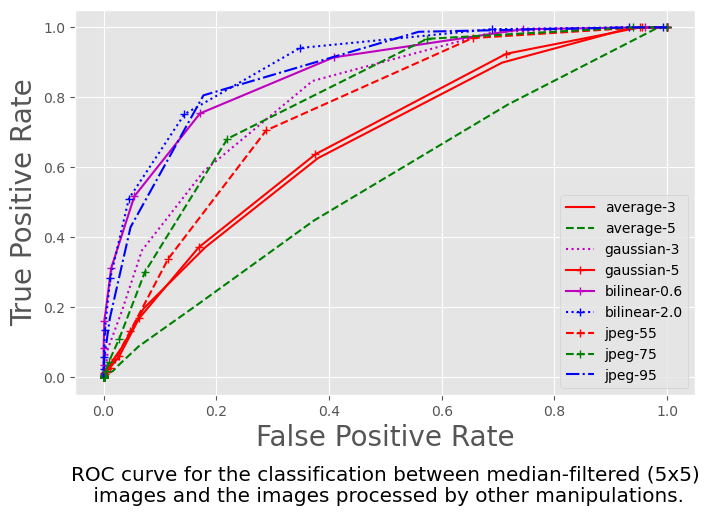

In [7]:
# Ploting features
markers = ['r', 'g--', 'm:', 'r+-', 'm-+', 'b:+', 'r+--', 'g+--', 'b-.']
for i, (filter_n, rates) in enumerate(filter_rates.items()):
    plt.plot(rates['FP-rates'], rates['TP-rates'], markers[i], label=filter_n)

plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
plt.title('ROC curve for the classification between median-filtered (5x5)\n images and the images processed by other manipulations.',
           y=-0.30)
plt.legend()
plt.rcParams['figure.figsize'] = [8, 5]
plt.show()